In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# 1. Cluster Summary

In [2]:
start = pd.read_csv('./grn_vs_velocity/start_df.csv', index_col=0)
velo100 = pd.read_csv('./grn_vs_velocity/end_df_velocity_100.csv', index_col=0)
noclip100 = pd.read_csv('./grn_vs_velocity/end_df_noclipping_100.csv', index_col=0)
clip100 = pd.read_csv('./grn_vs_velocity/end_df_clipping_100.csv', index_col=0)

In [3]:
df = start.merge(velo100, left_index=True, right_index=True).merge(noclip100, left_index=True, right_index=True).merge(clip100, left_index=True, right_index=True)

In [4]:
df.columns = ['start', 'velocity','grn_no_clipping','grn_clipping']

In [5]:
df = df.melt(ignore_index=False).reset_index()

In [6]:
df.head()

,index,variable,value
0,Ductal,start,24.78
1,Ngn3 high EP,start,17.37
2,Pre-endocrine,start,16.02
3,Beta,start,15.99
4,Alpha,start,13.01


In [13]:
colors = ["#FF1493", '#00B300',"#00BFFF", '#00B2EE']

In [14]:
order = ['Ductal','Ngn3 low EP', 'Ngn3 high EP','Pre-endocrine',
         'Delta','Epsilon','Alpha','Beta']

<AxesSubplot:xlabel='value', ylabel='index'>

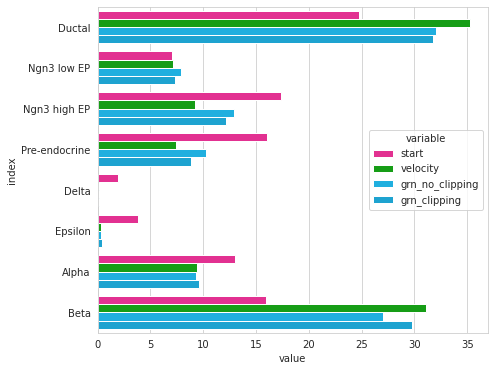

In [15]:
plt.figure(figsize=[7, 6])
sns.barplot(y="index", x="value", hue="variable", data=df, orient='h', palette=colors, order = order, capsize=20)

In [ ]:
import multiprocessing as mp

In [ ]:
def trajectories(tmat, n_steps, n_neighbors, n_cells, n_duplication):
    start_cell_id_array = np.repeat(np.arange(n_cells), n_duplication)
    transitions = []
    for i in start_cell_id_array:
        X = [i]
        for _ in range (n_steps):
            t = T[X[-1]]
            indices, p = t.indices, t.data
            idx = np.argsort(t.data)[::-1][:n_neighbors]
            indices, p = indices[idx], p[idx]
            p /=np.sum(p)
            ix = np.random.choice(indices, p = p)
            X.append(ix)
        transitions.append(X)
    #results:
    trajectory_df = pd.DataFrame(transitions)
    trajectory_df.index = trajectory_df[0]
    return np.asarray(trajectory_df)

In [ ]:
ns = np.array([int(n_duplication/10)]*10)
pool = mp.Pool(10)
rngs = [np.random.RandomState(i) for i in range(10)]
results = np.array(pool.map(trajectories, zip(rngs,ns)))
